# 1. Introduction

For this exercise I have decided to work on the HR attrition data. I have some knowledge about this topic already because I know a Human Research Manager personally. Because we have spoken about HR analytics for a long time I think using an alogorithm on the topic of attrition is therefore definitely very interesting. Of the HR Attrition dataset provided I have chosen the variables: WorkLifeBalance, PerformanceRating, JobSatisfaction, MonthlyIncome, DistanceFromHome, JobInvolvement and YearsSinceLastPromotion. These variables definitely have an impact on the attrition of some people. Aspects like the lack of promotion and a long distance from home can have a significant impact on the view of the employee both on now and on future possibilities.

# 2. Data cleaning

In [27]:
import seaborn as sns
from sklearn import metrics
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Attrition.csv') # first we read in the .csv file
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
for col in df.columns: # lets loop over the columns to look at the data we have at hand
    print(col) 

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


To cleanup the data lets first subset the most important values for atrition!

In [5]:
df_subset = df[['Attrition', 'WorkLifeBalance', 'PerformanceRating', 'JobSatisfaction', 'MonthlyIncome', 'DistanceFromHome', 'JobInvolvement','YearsSinceLastPromotion']]
df_subset.head() # print the subset of the filtered dataset

,Attrition,WorkLifeBalance,PerformanceRating,JobSatisfaction,MonthlyIncome,DistanceFromHome,JobInvolvement,YearsSinceLastPromotion
0,Yes,1,3,4,5993,1,3,0
1,No,3,4,2,5130,8,2,1
2,Yes,3,3,3,2090,2,2,0
3,No,3,3,3,2909,3,3,3
4,No,3,3,2,3468,2,3,2


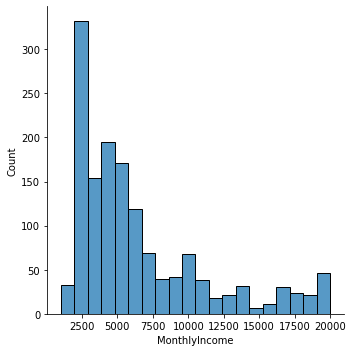

In [6]:
sns.displot(df_subset['MonthlyIncome'], kde=False) #plot histogram of the MonthlyIncome

The MonthlyIncome histogram does not show a normal distribution. 

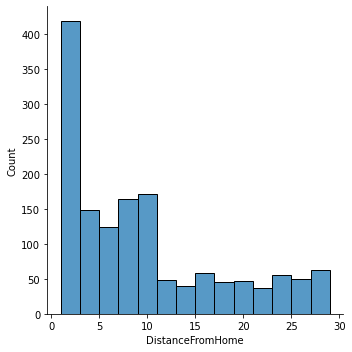

In [7]:
sns.displot(df_subset['DistanceFromHome'], kde=False) #plot histogram of DistanceFromHome

Looking at the data again it shows a histogram without outliers. This dataset does NOT seem to have unrealistic values which seem to be impossible. This meaning that the chosen HR dataset is already quite clean and doesn't seem to need any more work besides the analysis itself.

# 3. Exploratory data analsys

Lets take a lot at the data a little bit more!

<AxesSubplot:xlabel='MonthlyIncome'>

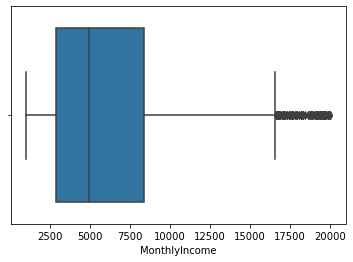

In [9]:
sns.boxplot(x=df_subset['MonthlyIncome']) # plot boxplot of MonthlyIncome

From the 'MonthlyIncome' boxplot it shows there are a lot of outliers on the data. Although with the basic theory of outliers you could make the decision to remove them. But we have to keep thinking. The outliers shown don't fit in the standard deviation, but that doesn't make it impossible. The basis of the statistics is to interpret results and not to bend them to what you already know. Meaning that removing these outliers would mean removing a lot of values that are definitely possible putting a big bias on this data analsyis. It is important not to bend reality to a statistical analysis. To preserve the trustworthiness I have therefore chosen not to remove them.

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

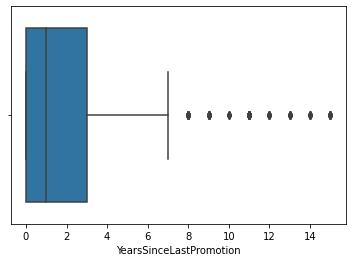

In [10]:
sns.boxplot(x=df_subset['YearsSinceLastPromotion']) # plot boxplot of YearsSinceLastPromotion

The aforementioned theory also applies to the boxplot of YearsSinceLastPromotion.

No     1233
Yes     237
Name: Attrition, dtype: int64

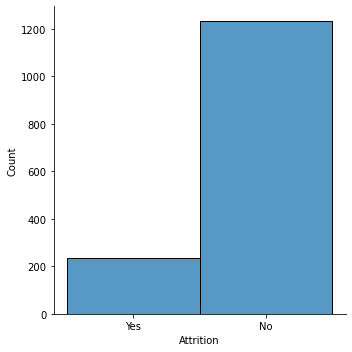

In [60]:
sns.displot(df_subset['Attrition'], kde=False) #plot histogram of Attrition
df_subset['Attrition'].value_counts()

The histogram doesn't provide us with any statistical insights but does give us a better idea about the data we are dealing with. As the data shows the amount of "No" attrition is much higher than "Yes"

Now lets look at the correlations between the values!

In [18]:
df_subset.corr()

,WorkLifeBalance,PerformanceRating,JobSatisfaction,MonthlyIncome,DistanceFromHome,JobInvolvement,YearsSinceLastPromotion,No_attrition,Yes_attrition
WorkLifeBalance,1.000000,0.002572,-0.019459,0.030683,-0.026556,-0.014617,0.008941,0.063939,-0.063939
PerformanceRating,0.002572,1.000000,0.002297,-0.017120,0.027110,-0.029071,0.017896,-0.002889,0.002889
JobSatisfaction,-0.019459,0.002297,1.000000,-0.007157,-0.003669,-0.021476,-0.018214,0.103481,-0.103481
MonthlyIncome,0.030683,-0.017120,-0.007157,1.000000,-0.017014,-0.015271,0.344978,0.159840,-0.159840
DistanceFromHome,-0.026556,0.027110,-0.003669,-0.017014,1.000000,0.008783,0.010029,-0.077924,0.077924
JobInvolvement,-0.014617,-0.029071,-0.021476,-0.015271,0.008783,1.000000,-0.024184,0.130016,-0.130016
YearsSinceLastPromotion,0.008941,0.017896,-0.018214,0.344978,0.010029,-0.024184,1.000000,0.033019,-0.033019
No_attrition,0.063939,-0.002889,0.103481,0.159840,-0.077924,0.130016,0.033019,1.000000,-1.000000
Yes_attrition,-0.063939,0.002889,-0.103481,-0.159840,0.077924,-0.130016,-0.033019,-1.000000,1.000000


This table looks impressive but stores a lot of information which is pretty hard to interpret from one look. Lets make a visual pretenation the correlation. But looking at a correlation beforehand we can already make sort of a prediction of what the model is going to do. If there is a low correlation, how could the model be realistic?

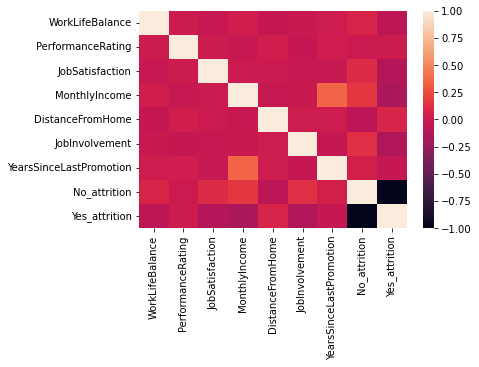

In [19]:
sns.heatmap(df_subset.corr());

# 4. Predictive model

In simple terms k-nearest neighbor is an algorithm which can be used for classification as well as regression. By using the K-Nearest Neighbor (KNN) method it is therefore possible to predict the level of attrition. 

In [14]:
from sklearn.preprocessing import normalize

X = df_subset[['WorkLifeBalance', 'PerformanceRating', 'JobSatisfaction', 'MonthlyIncome', 'DistanceFromHome', 'JobInvolvement','YearsSinceLastPromotion']] 
X = normalize(X) 
y = df_subset['Attrition'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In the code above the data was divided into several training en test sets.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) 
knn = knn.fit(X_train, y_train) 
knn.score(X_test, y_test) 

0.800453514739229

Results show that our model is around 80.0% accurate.

# 5. Evaluation

It is now important to evaluate the result that we got!

In [23]:
from sklearn.metrics import confusion_matrix

y_test_pred = knn.predict(X_test) 
cm = confusion_matrix(y_test, y_test_pred) 
cm

array([[350,  14],
       [ 74,   3]], dtype=int64)

In [25]:
conf_matrix = pd.DataFrame(cm, index=['False_actual','True_actual'], columns = ['False_predicted','True_predicted']) 
conf_matrix

,False_predicted,True_predicted
False_actual,350,14
True_actual,74,3


The confusion matrix above shows us some really interesting data. Let's interpret them! So lets start with the false_actual. There we 364 (350 + 14) values False_actual. Our model predicted that 350 were actually false which turned out to be (true positive). But 14 were false and we predicted them to be true (type 1 error - false positive). After that we have we predicted 73 to be false but they were actually true (type 2 error - false negative). 3 of the values we predicted to be true were actually true (true negative)

In [58]:
#print accuracy of model
print(metrics.accuracy_score(y_test, y_test_pred))

#print precision value of model
print(metrics.precision_score(y_test, y_test_pred, average='weighted'))

#print recall value of model
print(metrics.recall_score(y_test, y_test_pred, average='weighted'))

0.800453514739229
0.71215404400754
0.800453514739229


The accuracy is around 80% which is pretty good but could definitely be improved. The accuracy pretty much tells us, if we have a 100 cases, the model will get 80% correct. (should be as high as possible)

The precision of our model tells us: of the values we predicted as true how many actually were true? (should without saying be as high as possible). In this case 71.2%

Recall pretty much tells us: from all the amounts of true - how many were actually predicted correctly? In this case, 80.0%

# 6. Conclusion

What can we conclude from all of this? The conclusion is that we made a model with a pretty good prediction power. Although it could definitely be a lot higher, more in the 95%+ range. It is a good start and shows some potential. Reccomendations for new research could be to do more in depth research about correlations between variables and pick ones more suitable. Maybe implement a different algorithm to get a better result.